Assignment 1A  
Camille Porter, Katalin Ferenc, Sarah Alkhateeb

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

import io
from google.colab import files

## Task 1: A classification example: fetal heart condition diagnosis

### Step 1. Reading the data

In [0]:
# Upload and read the CSV file.
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['CTG.csv']), header = 1)

Saving CTG.csv to CTG.csv


In [0]:
data.head()

,b,e,AC,FM,UC,DL,DS,DP,DR,Unnamed: 9,LB,AC.1,FM.1,UC.1,DL.1,DS.1,DP.1,ASTV,MSTV,ALTV,MLTV,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Unnamed: 31,A,B,C,D,E,AD,DE,LD,FS,SUSP,Unnamed: 42,CLASS,Unnamed: 44,NSP
0,240.0,357.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,NaN,9.0,NaN,2.0
1,5.0,632.0,4.0,0.0,4.0,2.0,0.0,0.0,0.0,NaN,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
2,177.0,779.0,2.0,0.0,5.0,2.0,0.0,0.0,0.0,NaN,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
3,411.0,1192.0,2.0,0.0,6.0,2.0,0.0,0.0,0.0,NaN,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,NaN,6.0,NaN,1.0
4,533.0,1147.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,NaN,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,NaN,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,2.0,NaN,1.0


In [0]:
# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)
print(X.head())

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)
print(Y.head())

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

         LB   AC   FM   UC   DL  ...   Mode   Mean  Median  Variance  Tendency
658   130.0  1.0  0.0  3.0  0.0  ...  134.0  133.0   135.0       1.0       0.0
1734  134.0  9.0  1.0  8.0  5.0  ...  150.0  146.0   150.0      33.0       0.0
1226  125.0  1.0  0.0  4.0  0.0  ...  131.0  130.0   132.0       1.0       0.0
1808  143.0  0.0  0.0  1.0  0.0  ...  145.0  144.0   146.0       1.0       0.0
825   152.0  0.0  0.0  4.0  0.0  ...  159.0  156.0   158.0       1.0       1.0

[5 rows x 21 columns]
658      normal
1734     normal
1226     normal
1808     normal
825     suspect
Name: NSP, dtype: object


### Step 2. Training the baseline classifier

In [0]:
# Creating a baseline using the most common result
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')

# and see how it performs over the dataset using cross validation

from sklearn.model_selection import cross_val_score

cross_val_score(clf, Xtrain, Ytrain).mean()

0.7805882352941176

Using a cross-validation over the training set and calculating the classification accuracy on each fold, we carried out 5 separate learning experiments (5 folds) where we pick one test set and train on the rest (4 sets in this case). After averaging test results from those 5 experiments we got 0.78. 

If we predict normal (the most common type) for every case, we are right about 78% of the time. The dummy performs pretty well, probably the majority of the data is the most common type.


### Step 3. Trying out some different classifiers

First, we ran DecisionTreeClassifier with defaut settings on our training data and we saw that we got higher scores on cross-validation than we got by picking the most common value (DummyClassifier). So this classifier is able to learn from our training data and predict unseen observations.

In [0]:
#Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf_gini = DecisionTreeClassifier()

CV_result_gini = cross_val_score(decision_tree_clf_gini, Xtrain, Ytrain)
print(CV_result_gini)
print(CV_result_gini.mean())

[0.90882353 0.93529412 0.92352941 0.90588235 0.93823529]
0.9223529411764705


Next, we ran the same classifier, but with the setting of entropy (information gain) as the feature criterion instead of Gini (impurity) that was the default. We saw slightly higher CV scores in some parts and lower scores in other parts of our data. Overall it increased the prediction efficiency.

In [0]:
decision_tree_clf_entr = DecisionTreeClassifier(criterion="entropy")

CV_result_entr = cross_val_score(decision_tree_clf_entr, Xtrain, Ytrain)
print(CV_result_entr)
print(CV_result_entr.mean())

[0.93235294 0.94411765 0.93529412 0.92058824 0.92941176]
0.9323529411764705


We then continue with other type of classifiers, such as RandomForest, GradientBoosting or Perceptron. We do not set parameters of these classifiers, but compare them using their default settings.

In [0]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest_clf = RandomForestClassifier()
RF_result = cross_val_score(Random_Forest_clf, Xtrain, Ytrain)
print(RF_result)
print(RF_result.mean())

[0.93235294 0.95588235 0.93529412 0.93529412 0.94411765]
0.9405882352941177


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

GB_result = cross_val_score(GradientBoostingClassifier(), Xtrain, Ytrain)
print(GB_result)
print(GB_result.mean())

[0.94117647 0.96176471 0.94411765 0.94411765 0.95294118]
0.9488235294117647


In [0]:
from sklearn.linear_model import Perceptron

perceptron_result = cross_val_score(Perceptron(), Xtrain, Ytrain)
print(perceptron_result)
print(perceptron_result.mean())

[0.84705882 0.88529412 0.82941176 0.85294118 0.71176471]
0.825294117647059


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

Xscaled = preprocessing.scale(Xtrain)
lr_result = cross_val_score(LogisticRegression(max_iter=100000), Xscaled, Ytrain)
print(lr_result)
print(lr_result.mean())

[0.89117647 0.9        0.86764706 0.89411765 0.90588235]
0.891764705882353


In [0]:
from sklearn.svm import LinearSVC

linear_svc_result = cross_val_score(LinearSVC(max_iter = 10000), Xscaled, Ytrain)
print(linear_svc_result)
print(linear_svc_result.mean())

[0.88529412 0.90882353 0.86176471 0.89705882 0.9       ]
0.8905882352941177


In [0]:
from sklearn.neural_network import MLPClassifier

MLP_result = cross_val_score(MLPClassifier(), Xtrain, Ytrain)
print(MLP_result)
print(MLP_result.mean())

[0.88235294 0.91176471 0.89117647 0.87352941 0.89705882]
0.8911764705882353


### Step 4. Final evaluation

In the previous task we found that Gradient Boosting Classifier scores the highest. Its cross validation score on the training set is about 0.95. Therefore, we think it is a good method to predict the outcome based on this type of data. When we use the test data for evaluation and we got the accuracy 93% which is pretty high. So we conclude that this classifier performs well on new data.


In [0]:
from sklearn.metrics import accuracy_score

GB_final = GradientBoostingClassifier().fit(Xtrain, Ytrain)
Yguess = GB_final.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


## Task 2: Decision trees for classification

*Download the code that was shown during the lecture and use the defined class TreeClassifier as your classifier in an experiment similar to those in Task 1. Tune the hyperparameter max_depth to get the best cross-validation performance, and then evaluate the classifier on the test set.*


In [0]:
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        graph.node(node_id, str(self.value), style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False

In [0]:
class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id

In [0]:
from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth

    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be 
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        _, best_feature, best_threshold = max(self.best_split(X, Y, feature) for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass

In [0]:
from collections import Counter


class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=5, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return max_score, feature, split_point

In [0]:
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

We run the TreeClassifier on the same data as we used in Task1. We plot the accuracy of the training data when increasing the max tree depth.

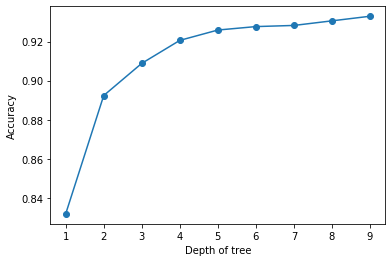

In [0]:
#sets the maximum depth for tree classifier
import matplotlib.pyplot as plt
import numpy as np
# List of values to try for max_depth:
max_depth_range = list(range(1, 10))
# 
accuracy = []
for d in max_depth_range:
    clf = TreeClassifier(max_depth = d)
    clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtrain, Ytrain)
    accuracy.append(score)
    
plt.plot(max_depth_range, accuracy, marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show();

As we expected, the training accuracy increases with the max tree depth as the classifier learns the data. However, we do not want it to learn the noise of the data too. Therefore we will choose a tree depth of 5, which has an accuracy of about 0.925. After 5, the accuracy goes up only a little, and we do not want to risk overfitting the data. 


In [0]:
cls = TreeClassifier(max_depth=5)
cross_val_score(cls, Xtrain , Ytrain, cv=5).mean()

0.9123529411764706

We see that the tree depth of 5 performs almost as well with prediction as it did with fitting. The cross validation score was 0.91 that is still pretty high. So depth of 5 seems to be a good choice. We fit the chosen classifier to the whole training data and plot the tree.

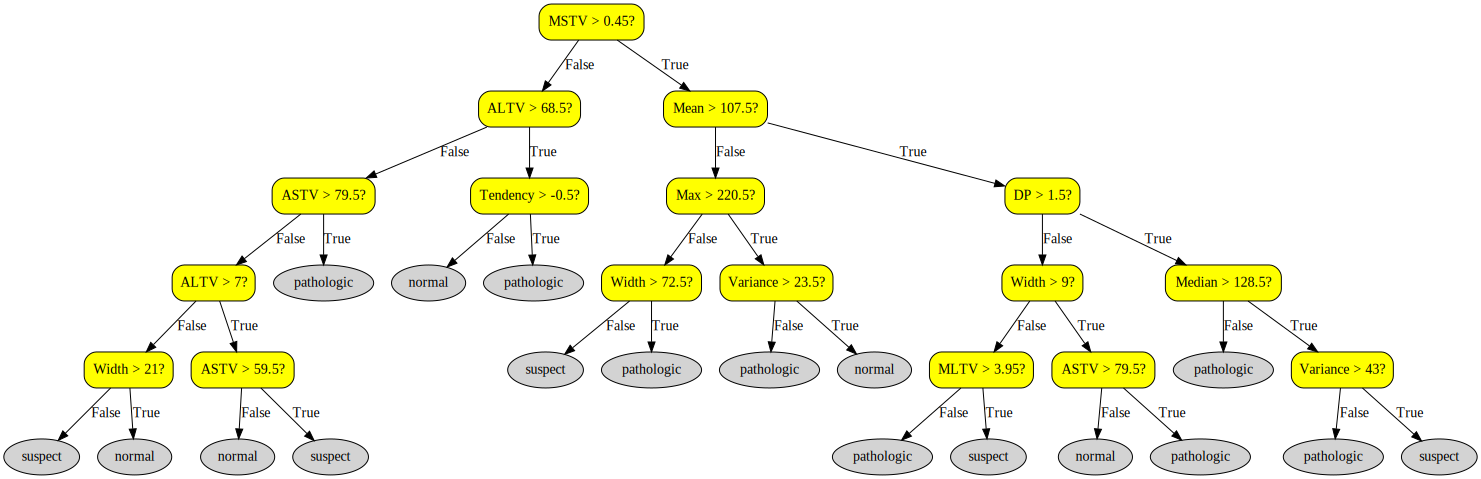

In [0]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

cls.fit(Xtrain, Ytrain)
cls.draw_tree()

Finally, we evaluate the accuracy of our model on the test data. The score is a bit lower 0.89 than it was in cross validation, but still quite high.

In [0]:
y_pred = cls.predict(Xtest)
print("Accuracy:",metrics.accuracy_score(Ytest, y_pred))

Accuracy: 0.8896713615023474


## Task 3: A regression example: predicting apartment prices

*This dataset was created by Sberbank and contains some statistics from the Russian real estate market. Since we will just be able to handle numerical features and not symbolic ones, we'll need with a simplified version of the dataset. So we'll just select 9 of the columns in the dataset. The goal is to predict the price of an apartment, given numerical information such as the number of rooms, the size of the apartment in square meters, the floor, etc. Our approach will be similar to what we did in the classification example: load the data, find a suitable model using cross-validation over the training set, and finally evaluate on the held-out test data.*

In [0]:
# Upload and read the CSV file.
uploaded = files.upload()
alldata = pd.read_csv(io.BytesIO(uploaded['sberbank.csv']))

Saving sberbank.csv to sberbank.csv


In [0]:
alldata.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452


In [0]:
# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 9 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=1)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [0]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
-cross_validate(m1, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.3925599360494389

Unlike in classification, we use mean squared error to evaluate the performance of the tested regressor. So for the other regressor below, we consider them useful if they score less than the DummyRegressor.

In [0]:
#linear regression
from sklearn.linear_model import LinearRegression

m2 = LinearRegression()
-cross_validate(m2, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.2961607293046175

In [0]:
#ridge
from sklearn.linear_model import Ridge

m3 = Ridge()
-cross_validate(m3, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.29616065181689616

In [0]:
#Lasso
from sklearn import linear_model

m4 = linear_model.Lasso()
-cross_validate(m4, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.3025169880005759

In [0]:
#Decision tree
from sklearn.tree import DecisionTreeRegressor

m5 = DecisionTreeRegressor(random_state=0)
-cross_validate(m5, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.5691889753971506

Interestingly, the DecisionTreeRegressor performs worse than our Dummy. Maybe it overfitted the data.

In [0]:
#Random forest regressor
from sklearn.ensemble import RandomForestRegressor

m6 = RandomForestRegressor(random_state=0, n_estimators=10)
-cross_validate(m6, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.31564738719406915

In [0]:
#GradientBoostingRegressor
from sklearn import ensemble

m7 = ensemble.GradientBoostingRegressor(random_state=0)
-cross_validate(m7, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()

0.26576567061993656

Similarly to the classifier, we could improve the fit by tuning the hyperparameters such as tree depth for tree regressor. We tried it, the fitting was not improved much so we just include the code below commented out.

In [0]:
#sets the maximum depth for tree regressor

# List of values to try for max_depth:
#max_depth = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
#acc = []
#for dep in max_depth:
    #clsf = DecisionTreeRegressor(max_depth = dep)
    #clsf.fit(xtrain, ytrain)
    #score= clsf.score(xtrain, ytrain)
    #acc.append(score)
    
#plt.plot(max_depth, acc, marker='o')
#plt.xlabel('Depth of tree')
#plt.ylabel('R^2')
#plt.show();

As mentioned above, we are using negative mean square error as our scoring criterion for evaluating the training performance. After running different regression models, we decided to use the Gradient Boost Regressor because it gives the minimum mean square value 0.27 and in this case, lower is better. 
Evaluating the method on the test set (after training it on the full training set) gave an average of the squares of the errors 0.27, which means that the data values are closely distributed to the fitted value. It is also almost the same score as the cross validation, so the test data is probably similar enough to the training data.


In [0]:
#train on the full training set and evaluate on the held-out test set using gradientboostregressor

from sklearn.metrics import mean_squared_error
  
m7.fit(xtrain, ytrain)
mean_squared_error(ytest, m7.predict(xtest))

0.2652054227501015

## Task 4: Decision trees for regression

### Step 1. Implementing the regression model

*For the final task, we'll implement a class TreeRegressor for regression with decision trees. It is probably a good idea to structure this in a similar way to the TreeClassifier, just adapted for regression instead. This means that you should probably write a new subclass that inherits from the same abstract superclass DecisionTree that the classifier used.* 



In [0]:
from sklearn.base import RegressorMixin
import numpy as np

class TreeRegressor(DecisionTree, RegressorMixin):

    def __init__(self, threshold, max_depth=10):
        super().__init__(max_depth)
        self.threshold = threshold

    def fit(self, X, Y):
        # ToDo: whatever is to be done here
        super().fit(X, Y)

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the mean value
    def get_default_value(self, Y):
        self.mean_value = np.mean(Y)
        return self.mean_value

    # Checks whether a set of output values is homogeneous.
    # In the regression case it means that the variance of the
    # values is below a certain threshold
    def is_homogeneous(self, Y):
        # ToDo: calculate variance and compare to pre-set threshold
        self.variance = np.var(Y)
        return self.variance <= self.threshold

    # Finds the best splitting point for a given feature.

    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        XY = sorted(zip(X[:, feature], Y))

        n = len(XY)

        # Variance before splitting
        Y_srt = [item[1] for item in XY]
        full_variance = (1/n)*(np.sum(np.square(Y_srt)))-np.square((1/n)*(np.sum(Y_srt)))

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the first and last position).
        for i in range(1, n-1):

            # Input and output at the current position.
            x_i = XY[i][0]
            y_i = XY[i][1]

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            x_next = XY[i+1][0]
            if x_i == x_next:
                continue
            # Using the variance of values to measure its homogeneity
            # Compute the variances of lower and higher parts up until this point
            low_var = (1/i)*(np.sum(np.square(Y_srt[:i])))-np.square((1/i)*(np.sum(Y_srt[:i])))
            high_var = (1/(n-i))*(np.sum(np.square(Y_srt[i:])))-np.square((1/(n-i))*(np.sum(Y_srt[i:])))

            # Compute the variance reduction of a split at this position
            score = full_variance - ((n-i)/n)*(high_var) - (i/n)*(low_var)
            
            #print("x: ", x_i)
            #print("full variance: ",full_variance)
            # print("low variance: ", low_var)
            #print("high variance: ", high_var)
            #print( "score: ", score)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(XY[max_i][0] + XY[max_i+1][0])
        return max_score, feature, split_point


### Step 2. Sanity check

*The following function will generate a small number of training examples for a simple regression task with one input variable.*



In [0]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) # X needs to be a 2-dimensional matrix
    return X, Y

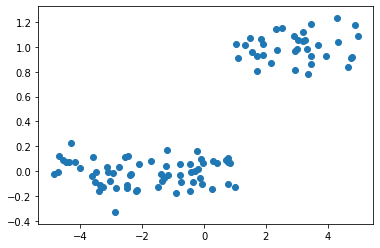

In [0]:
X,Y = make_some_data(100)

plt.scatter(X,Y);

We see that the data should be separated into two groups. So we set the max tree depth to 1.

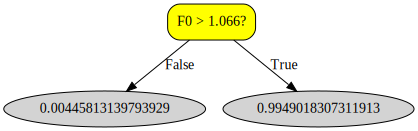

In [0]:
rls2 = TreeRegressor(0.1,max_depth=1)
# common sense dictates using 1 as max depth
# out of curiousity, we also tried max tree depth = 5, and we saw that
# tree does not change with setting it to 5 either 
# because 1 split already creates a good separation that
# creates groups of data which has variance below the set threshold
rls2.fit(X, Y)
rls2.draw_tree()

*If you consider the data-generating function, what kind of decision tree would we want to describe this data? Select the tree depth according to your common sense. Does the result make sense? What happens if we allow the tree depth to be a large number?*  
This data is not very complicated, with only 2 groups, so we would want a tree with only a depth of 1. When we allow it to be bigger, nothing changes, the depth is still 1. 






### Step 3. Predicting apartment prices using decision tree regression

*Train and evaluate a decision tree regression model for the Russian apartment price prediction example.*

We run cross validation with 5 folds in our data and see that the mean squared error decreases with increasing tree depth until a point. When max depth reaching 6 MSE starts increasing again because we overfit the training data thus the predicting power decreases.



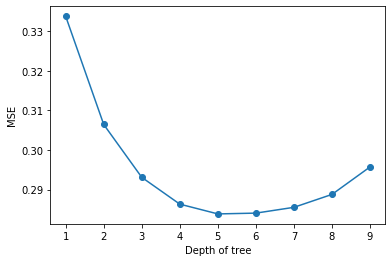

In [0]:
#sets the maximum depth for tree classifier

# List of values to try for max_depth:
max_depth = list(range(1, 10))
# List to store the average RMSE for each value of max_depth:
cvs = []
for dep in max_depth:
    clsf = TreeRegressor(0.1, max_depth = dep)
    score= -cross_validate(clsf, xtrain, ytrain, scoring='neg_mean_squared_error',cv=5)['test_score'].mean()
    cvs.append(score)
    
plt.plot(max_depth, cvs, marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('MSE')
plt.show();

From the plot, we can see that at depth 5 the mean sqaured error is the loweset so it is the best in this case. We plot the tree of depth 5 trained on the full data below.

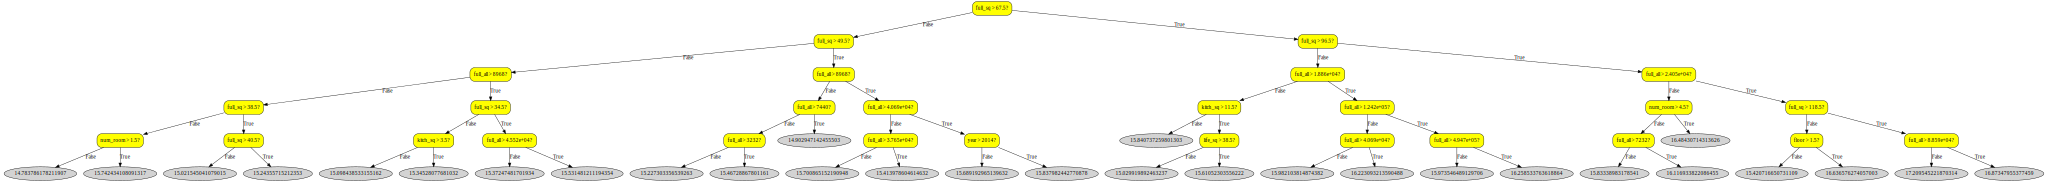

In [0]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

rls_apt = TreeRegressor(0.1,max_depth=5)

rls_apt.fit(xtrain, ytrain)
rls_apt.draw_tree()

We tested the model selected above on the test data. The final evaluation score is good, better than the dummy.

In [0]:
#evaluation score on the test set.
y_pred=rls_apt.predict(xtest)
print(mean_squared_error(ytest, y_pred))

0.2850287670520751


### Step 4. Underfitting and overfitting

*For the apartment price prediction task, draw a plot that shows the evaluation score on the training set and on the test set for different values of max_depth, ranging from 0 to 12. (It's probably easiest if you implement a function to draw this plot, but it's also OK if you draw the plot by hand.)*

*For the report. Please include this plot in the report, and comment on the differences between the two curves.* 

Out of curiosity, first we start experimenting with variance threshold combined with max tree depth. We saw above that tree depth of 5 seems best when using 0.1 as threshold. Here, we also try 0.2 and 0.3.

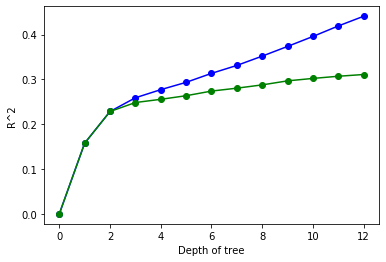

In [0]:
#sets the maximum depth for tree classifier

# List of values to try for max_depth:
max_depth = list(range(0, 13))
max_thr = [0.1, 0.3]
# List to store the average MSE for each value of max_depth:
acc = []
for dep in max_depth:
    rlsf = TreeRegressor(threshold= max_thr[0], max_depth = dep)
    rlsf.fit(xtrain, ytrain)
    score= rlsf.score(xtrain, ytrain)
    acc.append(score)

acc2 = []
for dep in max_depth:
    rlsf = TreeRegressor(threshold= max_thr[1], max_depth = dep)
    rlsf.fit(xtrain, ytrain)
    score= rlsf.score(xtrain, ytrain)
    acc2.append(score)
    
plt.plot(max_depth, acc, 'bo-', max_depth, acc2, 'go-')
plt.xlabel('Depth of tree')
plt.ylabel('R^2')
plt.show();

This first graph is just for fun. The R^2 value (given as a score of fit by the RegressorMixin class) is not too high, which means we are only able to predict a little of the variation in the data.  We can also see that having a threshold of 0.1 (blue) appears to be better for this data than 0.3 when the tree depth is above 3. 

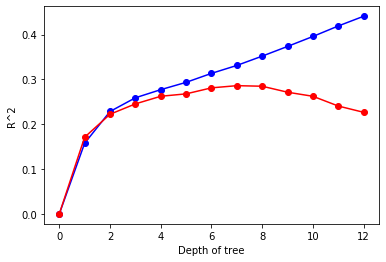

In [0]:
from sklearn.metrics import r2_score

# List of values to try for max_depth:
max_depth = list(range(0, 13))
max_score = [ytest, ytrain]
# List to store the average RMSE for each value of max_depth:
acc = []
for dep in max_depth:
    rlsf = TreeRegressor(0.1, max_depth = dep)
    rlsf.fit(xtrain, ytrain)
    score= rlsf.score(xtrain, ytrain)
    acc.append(score)

acc2 = []
for dep in max_depth:
    rlsf = TreeRegressor(0.1, max_depth = dep)
    rlsf.fit(xtrain, ytrain)
    ypred = rlsf.predict(xtest)
    score= r2_score(ytest, ypred)
    acc2.append(score)
    
plt.plot(max_depth, acc, 'bo-', max_depth, acc2, 'ro-')
plt.xlabel('Depth of tree')
plt.ylabel('R^2')
plt.show();

As we see in the second plot, the training data score continues to increase as tree depth increases. This occurs because the tree starts to learn the noise, that is overfitting the data. We can see that the test data score becomes flat and then goes down as the depth of the tree increases. It looks like a depth of 6 is ideal, because that is the best prediction we could achieve in test data while avoiding overfitting and still keeping the tree fairly small.